In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


# **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Importing Dataset**

In [3]:
dataset = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Checking if there are any NULL values.**

In [5]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# **Count Plot for species in Iris**

<AxesSubplot:xlabel='species', ylabel='count'>

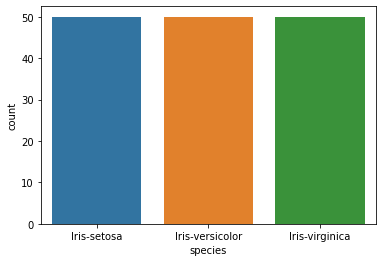

In [6]:
sns.countplot(x= 'species', data= dataset)

In [7]:
dataset.species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

# **Heat Map Correlation**

<AxesSubplot:>

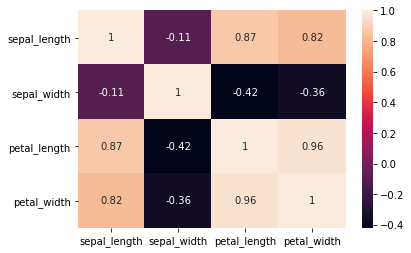

In [8]:
sns.heatmap(data= dataset.corr(), annot= True)

# **Data Preprocessing**

In [9]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [10]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

# **Splitting dataset into Train and Test set**

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

# **Feature Scaling**

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# **Selection of Models**

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [16]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['Naive Bayes', GaussianNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier()])

lst_1= []

for m in range(len(models)):
  lst_2= []
  model = models[m][1]
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  cm = confusion_matrix(y_test, y_pred)
  accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
  print(models[m][0])
  print(cm)
  print('Accuracy Score',accuracy_score(y_test, y_pred))
  print('')
  print("Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
  print('')
  print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
  print('')
  print('-----------------------------------')
  print('')
  lst_2.append(models[m][0])
  lst_2.append((accuracy_score(y_test, y_pred))*100) 
  lst_2.append(accuracies.mean()*100)
  lst_2.append(accuracies.std()*100)
  lst_1.append(lst_2)

Logistic Regreesion
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy Score 1.0

Mean Accuracy: 95.00 %

Standard Deviation: 5.53 %

-----------------------------------

SVM
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy Score 1.0

Mean Accuracy: 94.17 %

Standard Deviation: 6.51 %

-----------------------------------

KNeighbors
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy Score 1.0

Mean Accuracy: 93.33 %

Standard Deviation: 6.24 %

-----------------------------------

Naive Bayes
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Accuracy Score 0.9666666666666667

Mean Accuracy: 95.00 %

Standard Deviation: 5.53 %

-----------------------------------

Decision Tree
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy Score 1.0

Mean Accuracy: 93.33 %

Standard Deviation: 5.00 %

-----------------------------------

Random Forest
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy Score 1.0

Mean Accuracy: 93.33 %

Standard Deviation: 5.00 %

-----------------------------------

[18:33:00] WARNING: ../src/learner

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder i

[18:33:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:33:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:33:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:33:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder i

[18:33:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:33:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:33:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:33:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

**Making Data Frame.**

In [17]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'Mean Accuracy', 'Std. Deviation'])

In [18]:
df.sort_values(by= ['Accuracy', 'Mean Accuracy'], inplace= True, ascending= False)

**Below shows the values of models in Descending Order.**

In [19]:
df

,Model,Accuracy,Mean Accuracy,Std. Deviation
0,Logistic Regreesion,100.000000,95.000000,5.527708
1,SVM,100.000000,94.166667,6.508541
2,KNeighbors,100.000000,93.333333,6.236096
4,Decision Tree,100.000000,93.333333,5.000000
5,Random Forest,100.000000,93.333333,5.000000
6,XGBoost,100.000000,93.333333,5.000000
3,Naive Bayes,96.666667,95.000000,5.527708


**Applying Grid Search on Top 3 above models for best parameters and model selection.**

1. Logistic Regression
2. SVM
3. KNeighbors

In [20]:
lr = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()

In [21]:
data = [(lr, [{'C': [0.01, 0.1, 0.5, 1.0], 'random_state':[0]}]),
        (svm, [{'C': [0.1, 0.5, 1.0], 'kernel': ['linear', 'rbf'], 'random_state':[0]}]),
        (knn, [{'n_neighbors': [2, 3, 5, 7, 10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}])]

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
for i,j in data:
  grid = GridSearchCV(estimator = i , param_grid = j , scoring = 'accuracy',cv = 10)
  grid.fit(x_train,y_train)
  best_accuracy = grid.best_score_
  best_parameters = grid.best_params_
  print('{} \nBestAccuracy : {:.2f}%'.format(i,best_accuracy*100))
  print('BestParameters : ',best_parameters)
  print('')

LogisticRegression() 
BestAccuracy : 95.00%
BestParameters :  {'C': 0.5, 'random_state': 0}

SVC() 
BestAccuracy : 94.17%
BestParameters :  {'C': 1.0, 'kernel': 'rbf', 'random_state': 0}

KNeighborsClassifier() 
BestAccuracy : 95.00%
BestParameters :  {'metric': 'euclidean', 'n_neighbors': 7}



# **Summary**

**Therefore, after applying GridSearch we can confirm that LogisticRegression and KNeighborsClassifier is best suited model for the dataset and both gives the accuracy of 95.00%.**